In [57]:
import pandas as pd
from datetime import datetime
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
#Original Data
test = pd.read_csv(r'OneDrive\Desktop\test.csv')
train = pd.read_csv(r'OneDrive\Desktop\train.csv')

In [59]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

### Cleaning the Data

In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


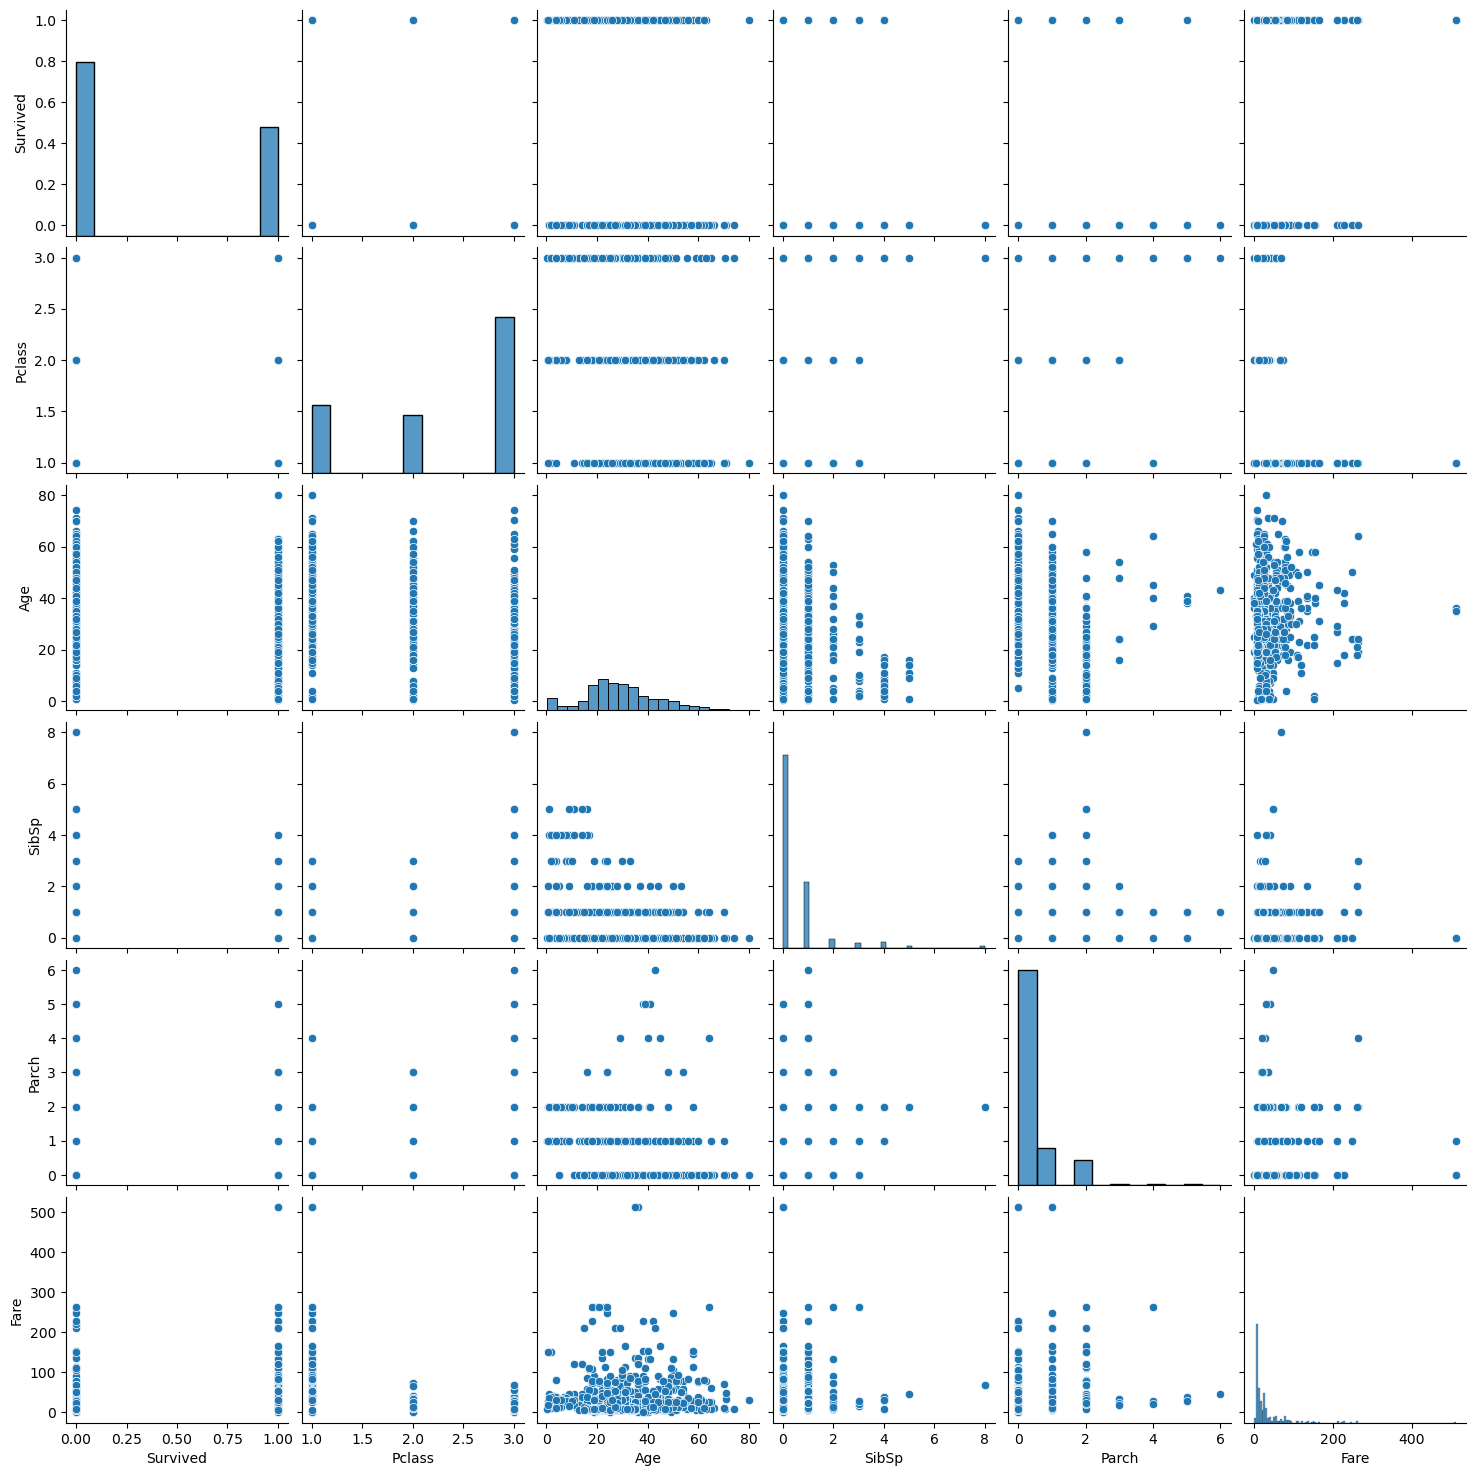

In [63]:
#correlation of non-numeric features
sns.pairplot(train.drop(columns=['PassengerId']))
plt.show()

In [64]:
#remove outlier high fare, remove id, name, ticket (ticket #) /drop fare >= 400 in test and train?

In [65]:
np.where(train.Fare >= 400, 1, 0).sum()

3

In [66]:
np.where(test.Fare >= 400, 1, 0).sum()

1

In [67]:
np.where(train.Fare >= 200, 1, 0).sum()

20

In [68]:
np.where(test.Fare >= 200, 1, 0).sum()

18

In [69]:
#Removing outliers and removing unnecessary columns (cleaning the data)
test = test.query("Fare < 400").drop(columns=['PassengerId', 'Name', 'Ticket'])
train = train.query("Fare < 400").drop(columns=['PassengerId', 'Name', 'Ticket'])

In [70]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [71]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### Relation Between Socio-Economic Status and Other Features

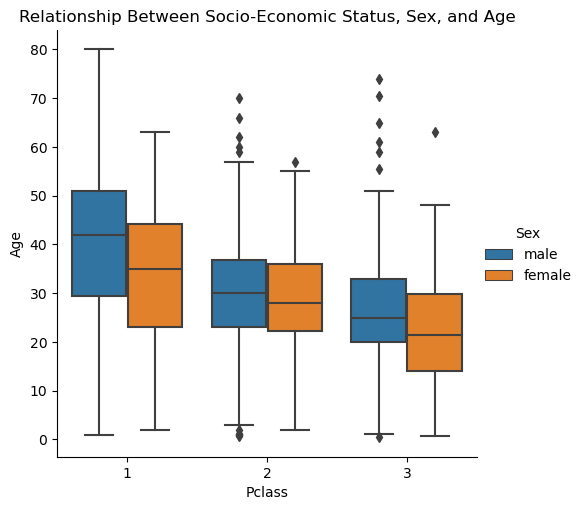

In [72]:
# how does class relate to age, sex and family member on board
#more old ppl in class 1 so no outliers, but in 2 and 3 there are so many more oyung ppl that the old ppl become outliers



sns.catplot(data=train, x="Pclass", y="Age", kind="box", hue="Sex").set(title="Relationship Between Socio-Economic Status, Sex, and Age")
plt.show()

In [73]:
#
train.groupby(['Pclass'])['Fare'].mean()

Pclass
1    78.124061
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [74]:
train.groupby(['Pclass', 'Parch'])['Fare'].mean()

Pclass  Parch
1       0         63.128312
        1        101.885000
        2        150.343648
        4        263.000000
2       0         17.467132
        1         27.609506
        2         33.499488
        3         20.875000
3       0         10.023412
        1         19.408033
        2         33.809300
        3         29.336100
        4         25.625000
        5         32.550000
        6         46.900000
Name: Fare, dtype: float64

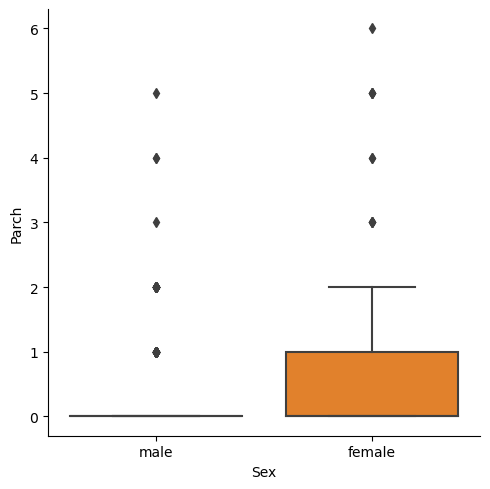

In [75]:
#Bad plot tbh

sns.catplot(data=train, x="Sex", y="Parch", kind="box")
plt.show()

In [76]:
train.query("Sex == 'female' & Parch > 0").shape

(120, 9)

In [77]:
train.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     93
        male      120
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [78]:
#Bad table tbh
train.groupby(['Pclass','Age']).size()

Pclass  Age  
1       0.92     1
        2.00     1
        4.00     1
        11.00    1
        14.00    1
                ..
3       61.00    1
        63.00    1
        65.00    1
        70.50    1
        74.00    1
Length: 182, dtype: int64

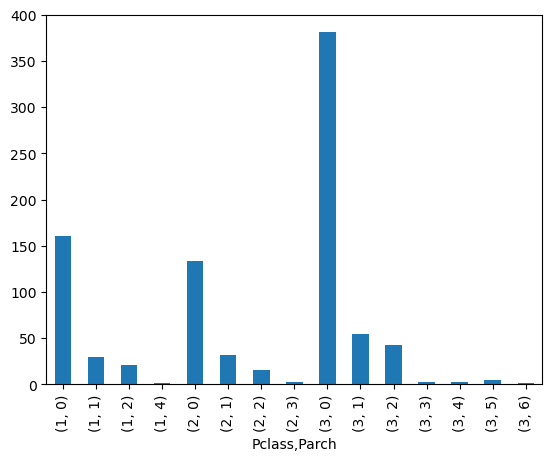

In [79]:
train.groupby(['Pclass','Parch']).size().plot.bar()
plt.show()

### Relation Between Survival Status and Other Features

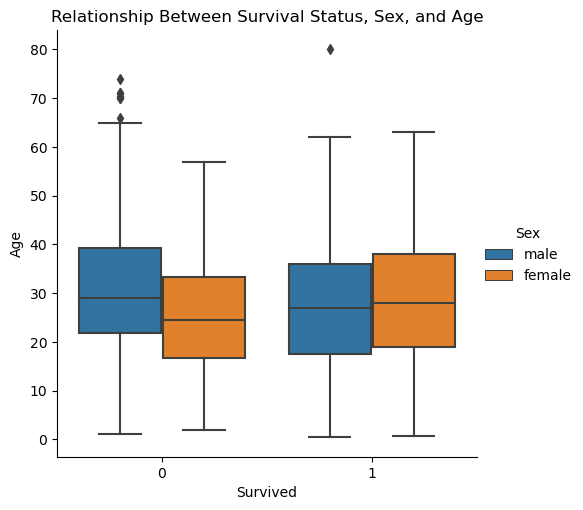

In [80]:

sns.catplot(data=train, x="Survived", y="Age", kind="box", hue="Sex").set(title="Relationship Between Survival Status, Sex, and Age")
plt.show()

In [81]:
train.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    44.289799
Name: Fare, dtype: float64

In [82]:
train.groupby(['Survived','Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    232
          male      107
dtype: int64

### Correlation Between All Numeric Features

In [83]:
#CORRELATION STUFF
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.079472,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,-0.368625,0.080937,0.018212,-0.604960
Age,-0.079472,-0.368625,1.000000,-0.307639,-0.189194,0.100396
SibSp,-0.033395,0.080937,-0.307639,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.189194,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,0.100396,0.211816,0.263910,1.000000


In [84]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [85]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [86]:
#logistic, KNN and 1 more (random_forest)

In [87]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [88]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

## Modeling and Question Answering

### Prepping the Data for Modeling

In [103]:
prepped_data = prep_data(train)
prepped_data_x = prepped_data.drop(columns = ['Survived'])
prepped_data_y = prepped_data['Survived']

train_test_list = train_test_split(prepped_data)
my_train = train_test_list[0]
my_test = train_test_list[1]

In [116]:
my_train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
582,0,2,54.0,0,0,26.0000,1,0,1
404,0,3,20.0,0,0,8.6625,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0
559,1,3,36.0,1,0,17.4000,0,0,1
540,1,1,36.0,0,2,71.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
498,0,1,25.0,1,2,151.5500,0,0,1
595,0,3,36.0,1,1,24.1500,1,0,1
858,1,3,24.0,0,3,19.2583,0,0,0
742,1,1,21.0,2,2,262.3750,0,0,0


### Functions for Modeling

In [105]:
def prep_data(data):
    droped_train = data.drop(columns=['Cabin']).dropna()
    sex_dummies = pd.get_dummies(droped_train.Sex, drop_first=True)
    embarked_dummies = pd.get_dummies(droped_train.Embarked, drop_first=True)

    new_train = pd.concat([droped_train.drop(columns=['Sex','Embarked']), sex_dummies, embarked_dummies], axis = 1)
    return new_train

def build_model(train_x, train_y, test_x, model_type, data_for_cv_x, data_for_cv_y):
    if model_type == "logistic_regression":
        model = LogisticRegression()
        cv_scores = cross_val_score(model, data_for_cv_x, data_for_cv_y, cv=5)
    
    elif model_type == "KNN":
        model  = KNeighborsClassifier(n_neighbors=3)
        cv_scores = cross_val_score(model, data_for_cv_x, data_for_cv_y, cv=5)  
    else:
        model = RandomForestClassifier(random_state = 0)
        cv_scores = cross_val_score(model, data_for_cv_x, data_for_cv_y, cv=5)
        
    model.fit(train_x, train_y)
    res = model.predict(test_x)
    return res, cv_scores

### Creating the 3 Models: Logistic Regression, K-Nearest-Neighbors, and Random Forest

In [106]:
my_train_x = my_train.drop(columns=['Survived'])
my_train_y = my_train['Survived']

my_test_x = my_test.drop(columns=['Survived'])
my_test_y = my_test['Survived']

lr_model = build_model(my_train_x, my_train_y, my_test_x, "logistic_regression", prepped_data_x, prepped_data_y)
lr_pred, lr_cv_scores = lr_model


knn_model = build_model(my_train_x, my_train_y, my_test_x, "KNN", prepped_data_x, prepped_data_y)
knn_pred, knn_cv_scores = knn_model

rf_model = build_model(my_train_x, my_train_y, my_test_x, "Random Forest", prepped_data_x, prepped_data_y)
rf_pred, rf_cv_scores = rf_model

C:\Users\ukolv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ukolv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [107]:
lr_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [108]:
knn_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0], dtype=int64)

In [109]:
rf_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [110]:
def print_all(test_y, y_prediction):
    my_f1_score = round(f1_score(test_y, y_prediction) , 4)
    my_recall_score = round(recall_score(test_y, y_prediction), 4)
    my_precision_score = round(precision_score(test_y, y_prediction), 4)
    my_accuracy_score = round(accuracy_score(test_y, y_prediction), 4)
    
    
    print('f1_score: {}'.format(my_f1_score))
    print('recall_score: {}'.format(my_recall_score))
    print('precision_score: {}'.format(my_precision_score))
    print('accuracy_score: {}'.format(my_accuracy_score))

### Evaluating the Performance of Each Model

In [111]:
print_all(my_test_y, lr_pred)

f1_score: 0.752
recall_score: 0.7705
precision_score: 0.7344
accuracy_score: 0.8258


In [112]:
print_all(my_test_y, knn_pred)

f1_score: 0.688
recall_score: 0.7049
precision_score: 0.6719
accuracy_score: 0.7809


In [113]:
print_all(my_test_y, rf_pred)

f1_score: 0.7377
recall_score: 0.7377
precision_score: 0.7377
accuracy_score: 0.8202


### Evaluating Performance After Cross Validation

In [114]:
#Accuracy of Model with Cross Validation
lr_cv_mean = round(np.mean(lr_cv_scores),4)
knn_cv_mean = round(np.mean(knn_cv_scores),4)
rf_cv_mean = round(np.mean(rf_cv_scores),4)

print('Mean Accuracy with Cross Validation Set of Logistic Regression Model: {}'.format(lr_cv_mean))
print('Mean Accuracy with Cross Validation Set of K-Nearest-Neighbors Model: {}'.format(knn_cv_mean))
print('Mean Accuracy with Cross Validation Set of Random Forest Model: {}'.format(rf_cv_mean))

Mean Accuracy with Cross Validation Set of Logistic Regression Model: 0.7885
Mean Accuracy with Cross Validation Set of K-Nearest-Neighbors Model: 0.6926
Mean Accuracy with Cross Validation Set of Random Forest Model: 0.7913


<!-- odds = probability / 1-probability
0 < odds <= 1 
-inf <= log (odds) <= inf

in linerar regression wed have y = Bo + B1x1...

the algorithm, logistic regression, picks the probability and coresponding liine so that the probability of that point is as close to 0 or 1
-> for any x, minimizes distance between that point and 0 or 1 depending on if its closer to 0 or 1
with logistic we have log(odds) = B0 + B1x1... which goes from -inf to inf 
we convert this back to probability

the line becomes less linear and becomes a better fit
-> you do log of odds to get the actual probability

you input a bunch of x's, the slope of x, and the interecept, and get a y for each x. And then you can this logistic regression on the y to get the probability. 

we dont have probabilities, but we have this mechanism of B0 + B1X1... to predict probabilities, which gives odds
so you log(odds) -->